In [1]:
# simple statistical analysis
# Author: Grace Guan 12/12/17

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# import the datasets
df14 = pd.read_csv("2014_final_condensed.csv")
df15 = pd.read_csv("2015_final_condensed.csv")

# remove errors
df14 = df14.replace(['#DIV/0!', '#VALUE!', 'N/E', '$-', 'N/A_MA_Issuer', 'N/A_DefaultCharge'], np.nan)
df15 = df15.replace(['#DIV/0!', '#VALUE!', 'N/E', '$-', 'N/A_MA_Issuer', 'N/A_DefaultCharge'], np.nan)

C:\Users\guanz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
numeric_cols = ['MM Individual',
 'MM Small Group',
 'Expected Reinsurance',
 'Expected Risk Adjustment Individual',
 'Expected Risk Adjustment Small Group',
 'Actual Reinsurance',
 'Actual Risk Adjustment Individual',
 'Actual Risk Adjustment Small Group',
 'Expected Reinsurance Per Member Month',
 'Actual Reinsurance Per Member Month',
 'Expected Risk Adjustment Per Member Month Individual',
 'Actual Risk Adjustment Per Member Month Individual',
 'Expected Risk Adjustment Per Member Month Small Group',
 'Actual Risk Adjustment Per Member Month Small Group',
 'Difference in Reinsurance Per Member Month',
 'Difference in Risk Adjustment Individual Per Member Month',
 'Difference in Risk Adjustment Small Group Per Member Month']

# suppress output for table in next cell

#print("Column\tMean2014\tMean2015\tMedian2014\tMedian2015\tStd2014\tStd2015" + 
#     "\tMin2014\tMin2015\tMax2014\tMax2015\tSum2014\tSum2015")

for col in numeric_cols:
    df14[col] = pd.to_numeric(df14[col])
    df15[col] = pd.to_numeric(df15[col])
    #print(col + "\t" + str(df14[col].mean()) + "\t" + str(df15[col].mean()) +
    #     "\t" + str(df14[col].median()) + "\t" + str(df15[col].median()) + 
    #     "\t" + str(df14[col].std()) + "\t" + str(df15[col].std()) + 
    #     "\t" + str(df14[col].min()) + "\t" + str(df15[col].min()) +
    #     "\t" + str(df14[col].max()) + "\t" + str(df15[col].max()) +
    #     "\t" + str(df14[col].sum()) + "\t" + str(df15[col].sum()))
    
combined = pd.merge(df14, df15, on='HIOS ID')

In [15]:
# combined.to_csv("combined_condensed.csv")

combined["Difference In Risk Adjustment 2015-2014 Small Group"] = combined["Actual Risk Adjustment Small Group_y"] - combined["Actual Risk Adjustment Small Group_x"]


combined["Difference In Risk Adjustment 2015-2014 Individual"] = combined["Actual Risk Adjustment Individual_y"] - combined["Actual Risk Adjustment Individual_x"]

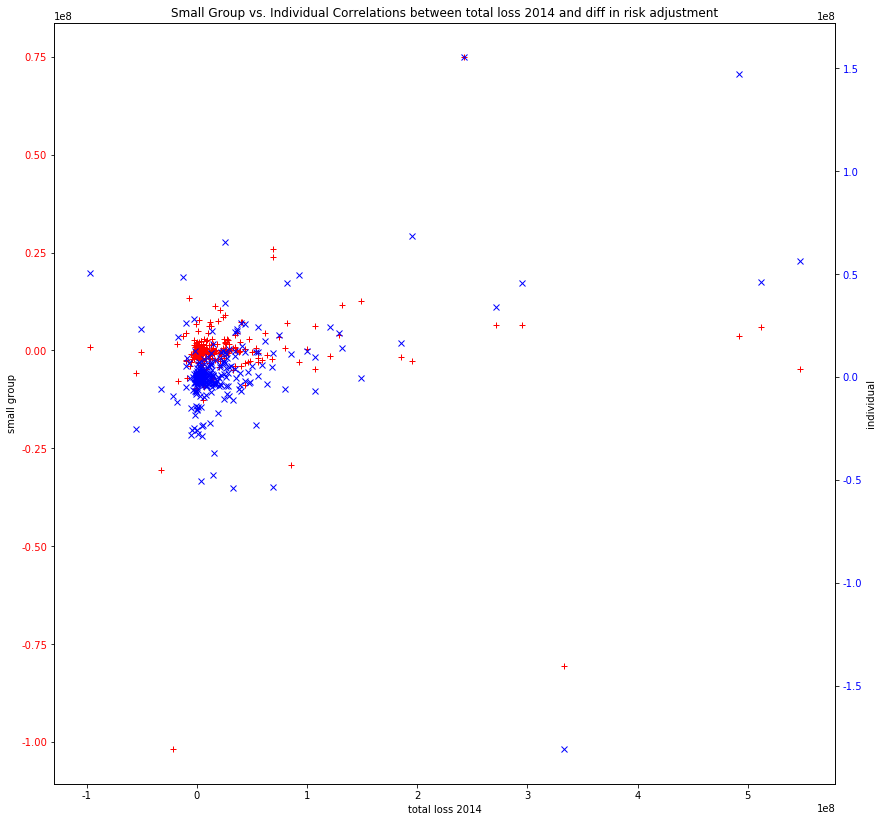

In [17]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax1 = plt.subplots(figsize=(14, 14))
ax1.set_title('Small Group vs. Individual Correlations between total loss 2014 and diff in risk adjustment')
ax2 = ax1.twinx()

ax1.plot(combined["Total Loss 2014"], 
         combined["Difference In Risk Adjustment 2015-2014 Small Group"], '+', color='r')
ax1.set_xlabel('total loss 2014')
ax1.set_ylabel('small group')

ax2.plot(combined["Total Loss 2014"], 
         combined["Difference In Risk Adjustment 2015-2014 Individual"], 'x', color='b')
ax2.set_ylabel('individual')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')

#ax1.set_ylim([-1000,1000])
#ax2.set_ylim([-1000,1000])
plt.show()

In [32]:
correlation = combined[["Total Loss 2014", "Difference In Risk Adjustment 2015-2014 Small Group"]].dropna(how='any')

In [33]:
correlation.head()

,Total Loss 2014,Difference In Risk Adjustment 2015-2014 Small Group
0,547232218.2,-4723907.04
1,332723377.6,-80557724.64
3,69207953.6,26031896.83
4,242798715.2,74845784.25
5,271234415.7,6573421.79


In [34]:
from scipy.stats.stats import pearsonr   
a = [1,4,6]
b = [1,2,3]   
print(pearsonr(a,b))

print(pearsonr(pd.to_numeric(correlation["Total Loss 2014"]), 
           correlation["Difference In Risk Adjustment 2015-2014 Small Group"]))

(0.99339926779878274, 0.073186395040328034)
(0.043487784817519637, 0.43531794731194962)


In [35]:
correlation2 = combined[["Total Loss 2014", "Difference In Risk Adjustment 2015-2014 Individual"]].dropna(how='any')

In [36]:
correlation2.head()

,Total Loss 2014,Difference In Risk Adjustment 2015-2014 Individual
0,547232218.2,5.647917e+07
1,332723377.6,-1.808903e+08
3,69207953.6,-5.334663e+07
4,242798715.2,1.553120e+08
5,271234415.7,3.388060e+07


In [37]:
print(pearsonr(pd.to_numeric(correlation2["Total Loss 2014"]), 
           correlation2["Difference In Risk Adjustment 2015-2014 Individual"]))

(0.35448843710118527, 6.1517868962800798e-11)
